<a href="https://colab.research.google.com/github/ManeKarthikeya/Filemanager/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


In [ ]:
model = keras.Sequential([

    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8372 - loss: 0.5252 - val_accuracy: 0.9815 - val_loss: 0.0606
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9724 - loss: 0.0888 - val_accuracy: 0.9870 - val_loss: 0.0399
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9798 - loss: 0.0637 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0493 - val_accuracy: 0.9904 - val_loss: 0.0276
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9870 - loss: 0.0411 - val_accuracy: 0.9922 - val_loss: 0.0244
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0371 - val_accuracy: 0.9901 - val_loss: 0.0295
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9889 - loss: 0.0341 - val_accuracy: 0.9925 - val_loss: 0.0226
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0317 - val_accuracy: 0

Test loss: 0.020646991208195686
Test accuracy: 0.9932000041007996


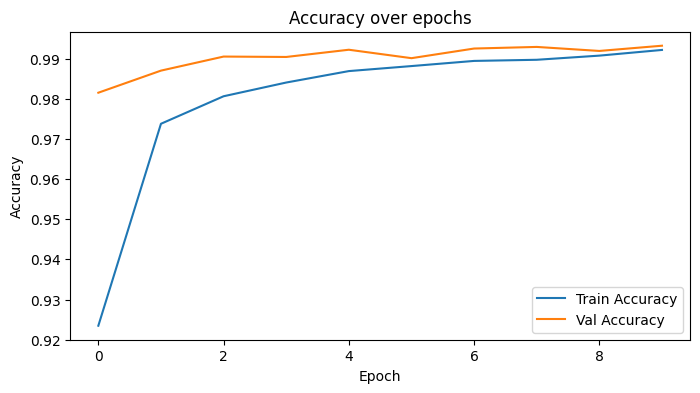

In [ ]:

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


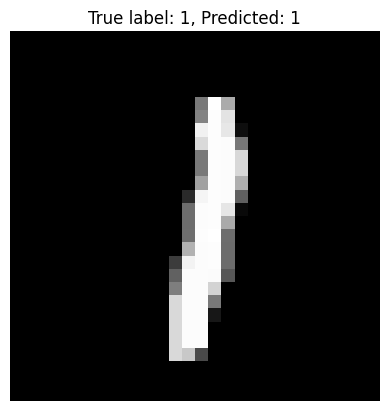

In [ ]:

import random
idx = random.randint(0, x_test.shape[0]-1)
test_image = x_test[idx]
true_label = np.argmax(y_test[idx])

pred_probs = model.predict(np.expand_dims(test_image, axis=0))
pred_label = np.argmax(pred_probs)

plt.imshow(test_image.reshape(28,28), cmap="gray")
plt.title(f"True label: {true_label}, Predicted: {pred_label}")
plt.axis("off")
plt.show()


Saving MNIST Dataset 2.jpg to MNIST Dataset 2 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


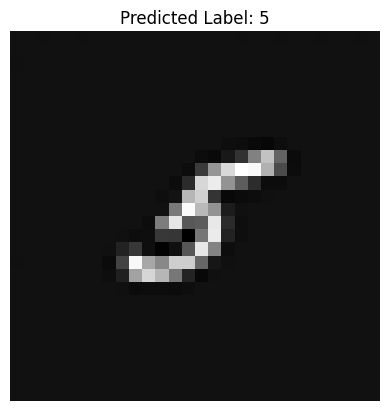

In [ ]:

from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()


for fn in uploaded.keys():

    img = Image.open(fn).convert('L')

    img = img.resize((28, 28))

    img_array = np.array(img).astype("float32") / 255.0

    img_array = img_array.reshape(1, 28, 28, 1)

    pred_probs = model.predict(img_array)
    pred_label = np.argmax(pred_probs)

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Label: {pred_label}")
    plt.axis("off")
    plt.show()
